In [2]:
!pip install pandas numpy seaborn


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.5 kB 667.8 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 657.6 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.5 kB 655.4 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.5 kB 554.9 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.5 kB 568.9 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 552.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.4/8.0 MB 12.6 MB/s eta 0:00

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("dataset.csv");

In [5]:
for column in df.columns:
    print(column)
    print(df[column].unique())

 Destination Port
[54865 55054 55055 ... 39950 61301 61326]
 Flow Duration
[    3   109    52 ... 55637 53596 21000]
 Total Fwd Packets
[   2    1    3   20   15    4    5    8   29    6   14   41   47   46
   45   27   23   26   51   50   48   52   49   21   42   43   44   78
   53   31   19   69   22   25   24   30   68   40   39   75   28   12
   17   18   13    7   11   38    9 1611   70   10  124   33   34   16
   54  225   56   32  220  103  390   97   58   72  111   85   71   73
   61   55   35  209  205  149  212  108   98   37  188  101   65   36
  114   91  246  100   62  102  105   79  106  122  277   76  126   82
   96  196   84  263   77   93   63   74   81   66  354  175   64  117
  107   92  457   67  142  135  116   60  143  112  120  155  214  201
  187  519  128  136  194  146  216  250  127  352  176  537  104   83
   99   59  171  251  298 1681  256  158  535  573  226  599  309  339
  315  481   57  200   95   94  145  161  110  249  164  317  350  474
  274  207  

In [7]:
num=[]
cat=[]
for column in df.columns:
  if df[column].dtype == 'O':
    cat.append(column)
  else:
    num.append(column)

In [8]:
nullAttr=[]
for column in df.columns:
  if df[column].isnull().sum() != 0:
    nullAttr.append(column)

nullAttr

['Flow Bytes/s']

In [9]:
for column in num:
  df[column].fillna(df[column].mean(),inplace=True)

C:\Users\subha\AppData\Local\Temp\ipykernel_9792\2282711404.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(),inplace=True)


In [10]:
nullAttr=[]
for column in df.columns:
  if df[column].isnull().sum() != 0:
    nullAttr.append(column)

nullAttr

[]

In [11]:
for id in num:
  iqr = df[id].quantile(0.75) - df[id].quantile(0.25)
  upper_bound=df[id].quantile(0.75) + 1.5*iqr
  lower_bound=df[id].quantile(0.25) - 1.5*iqr
  df.loc[df[id]>=upper_bound,id]=upper_bound
  df.loc[df[id]<=lower_bound,id]=lower_bound

C:\Users\subha\AppData\Local\Temp\ipykernel_9792\1904223358.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21906322.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[id]>=upper_bound,id]=upper_bound
C:\Users\subha\AppData\Local\Temp\ipykernel_9792\1904223358.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[id]>=upper_bound,id]=upper_bound
C:\Users\subha\AppData\Local\Temp\ipykernel_9792\1904223358.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '118.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[id]>=upper_bound,id]=upper_b

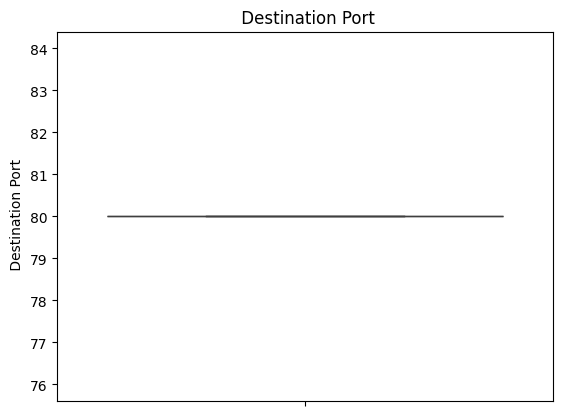

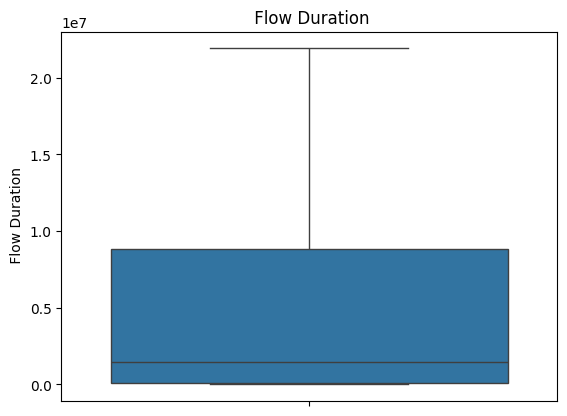

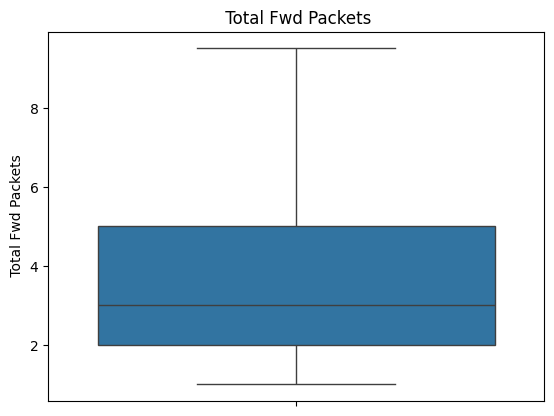

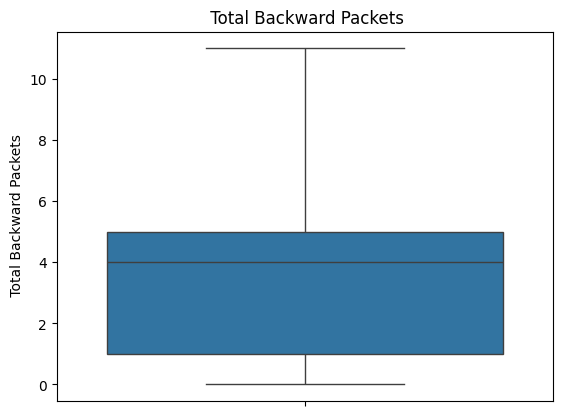

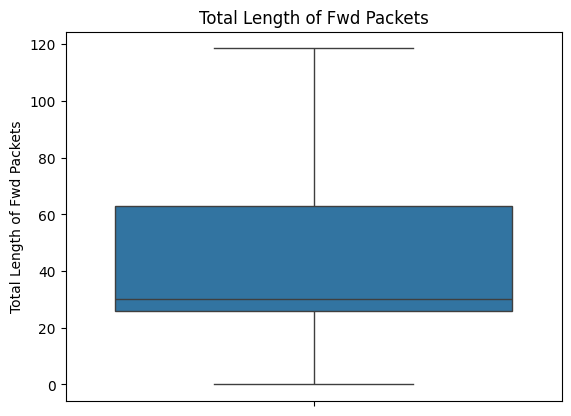

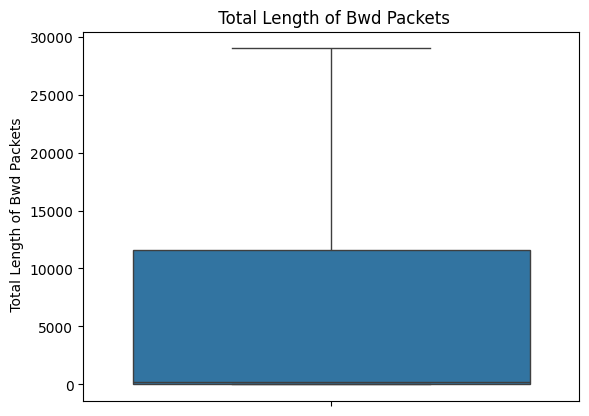

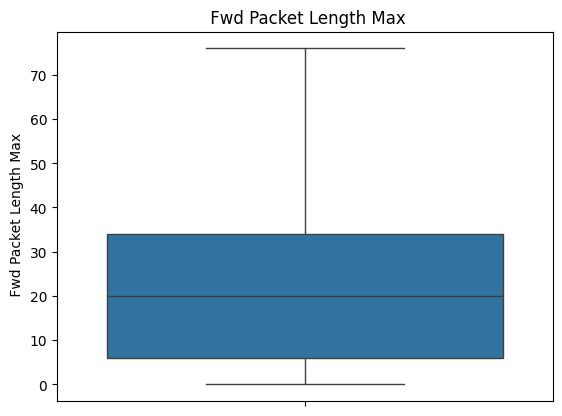

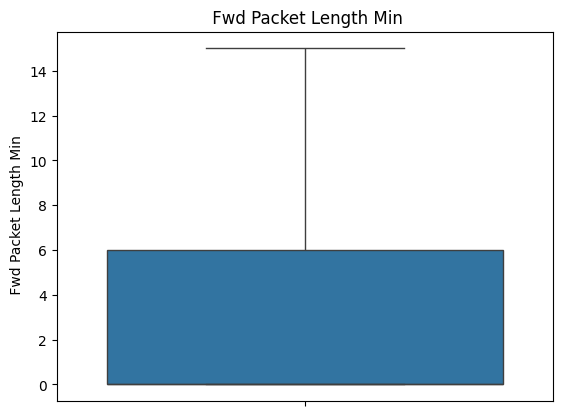

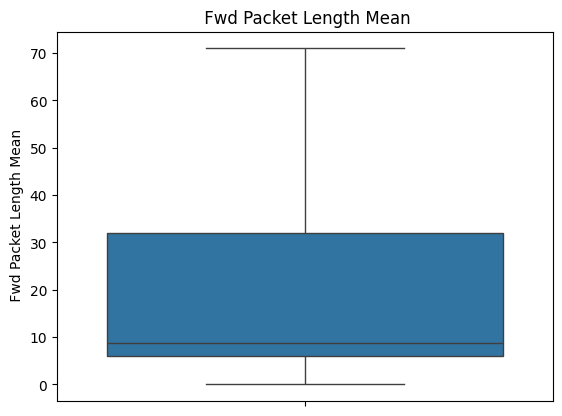

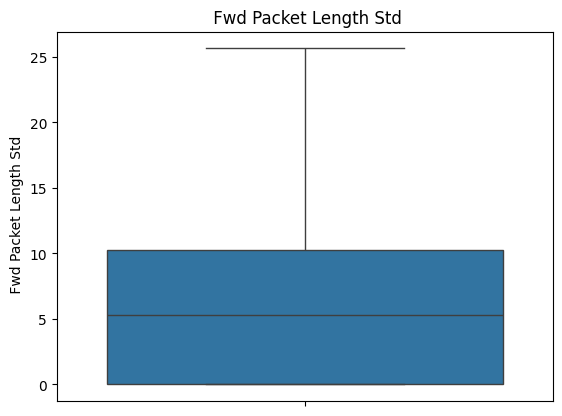

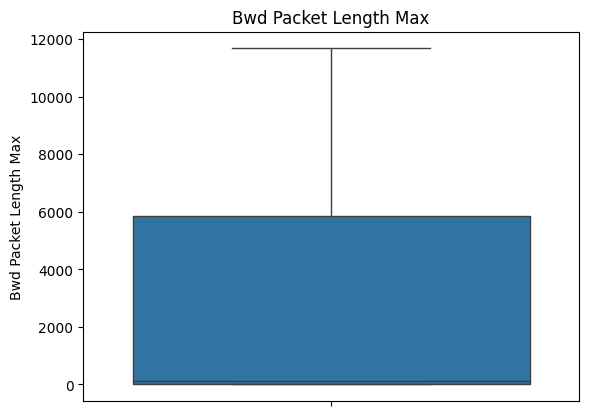

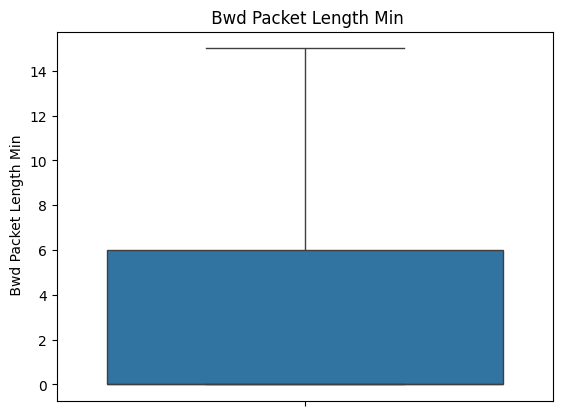

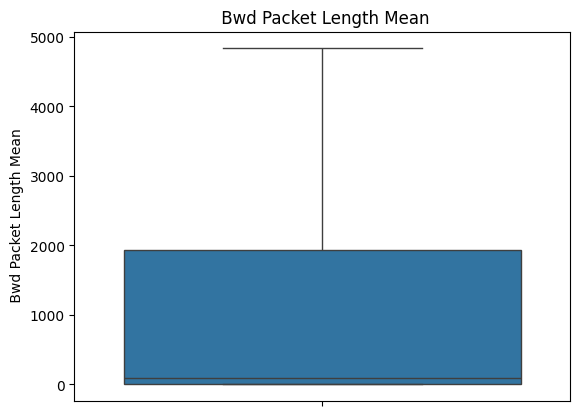

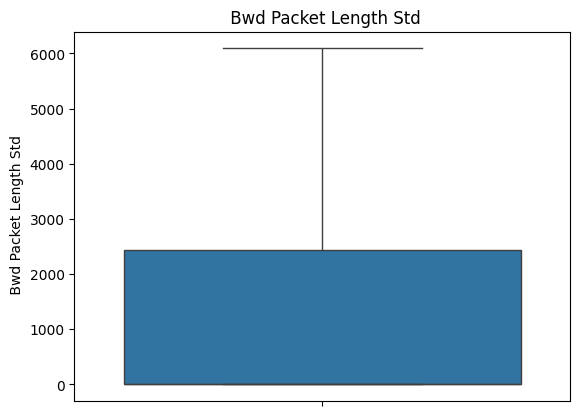

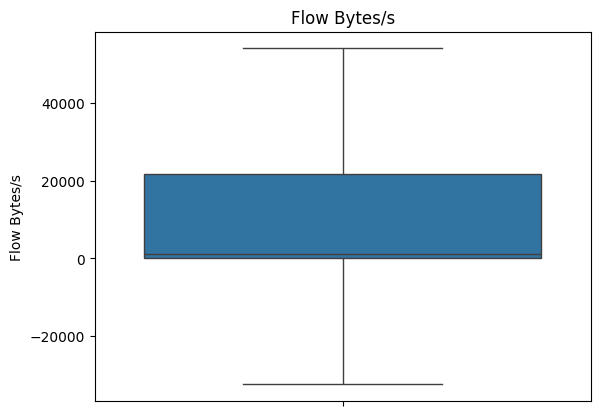

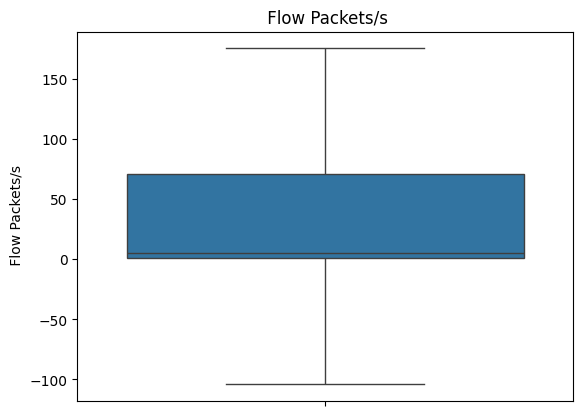

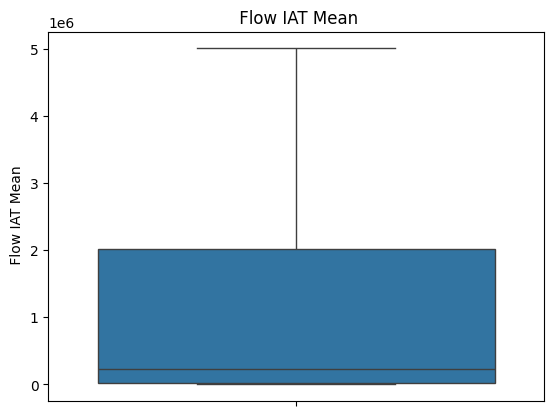

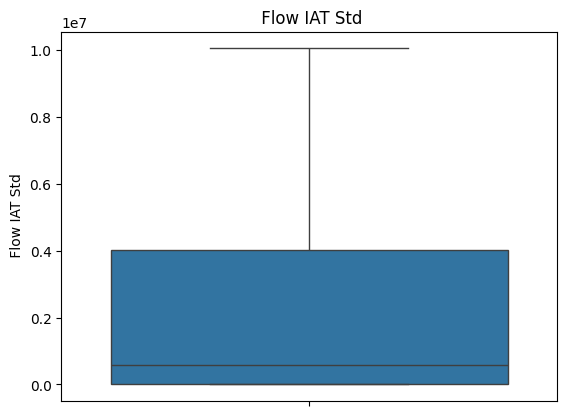

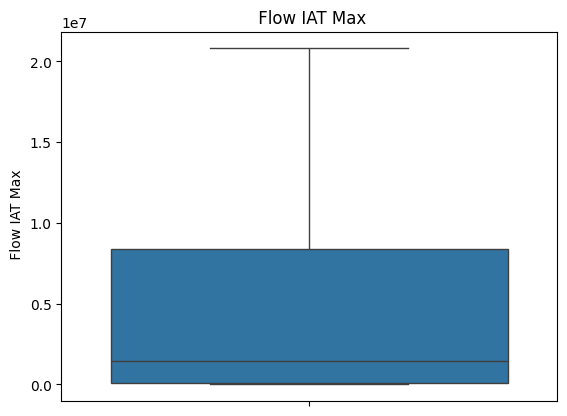

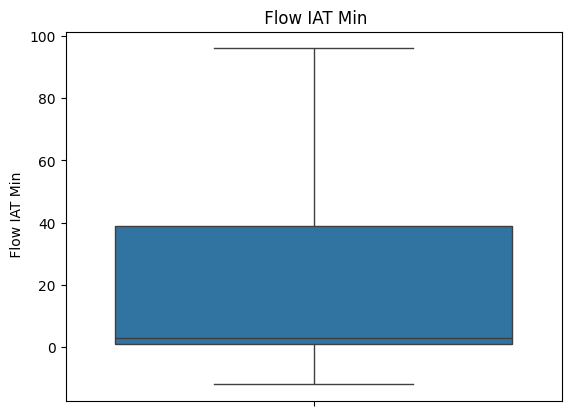

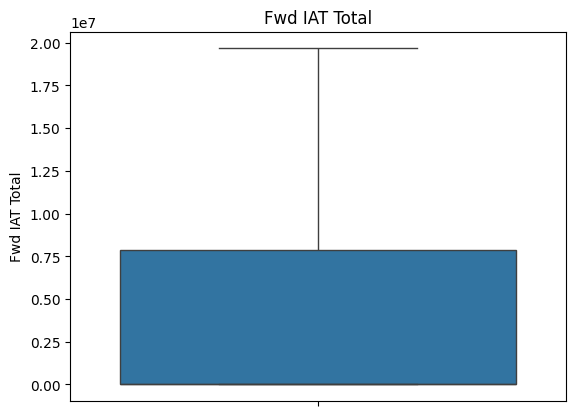

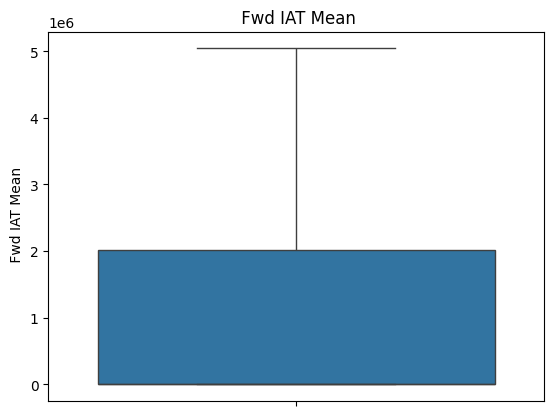

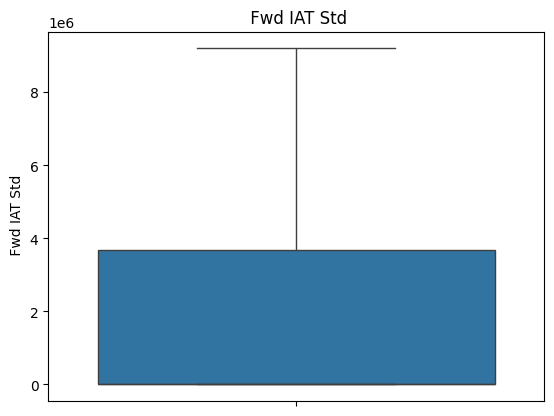

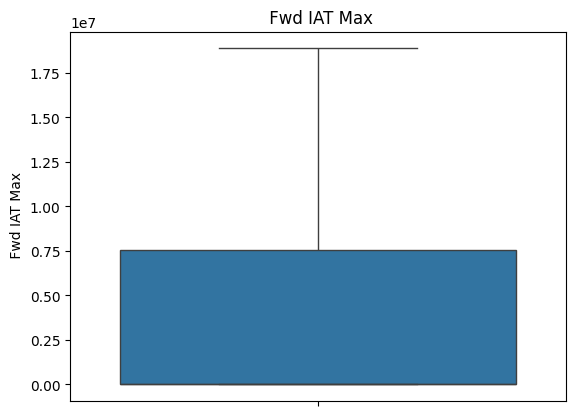

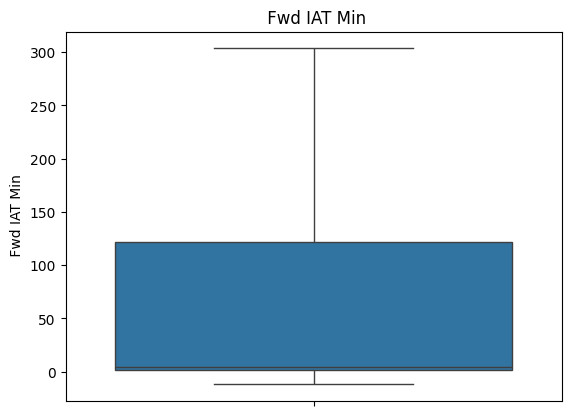

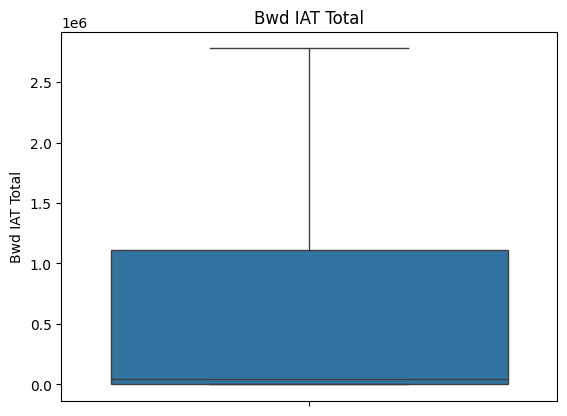

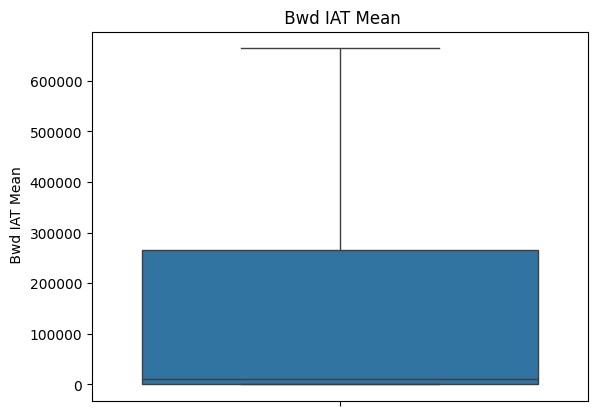

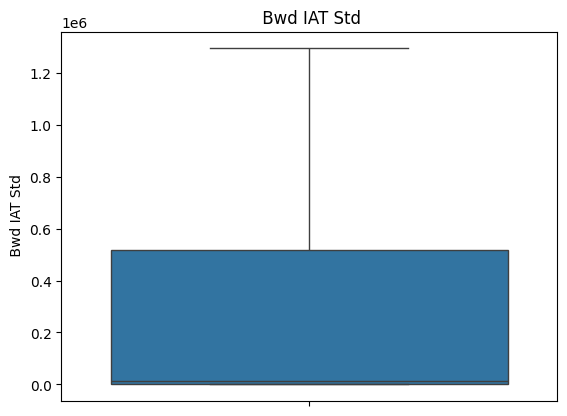

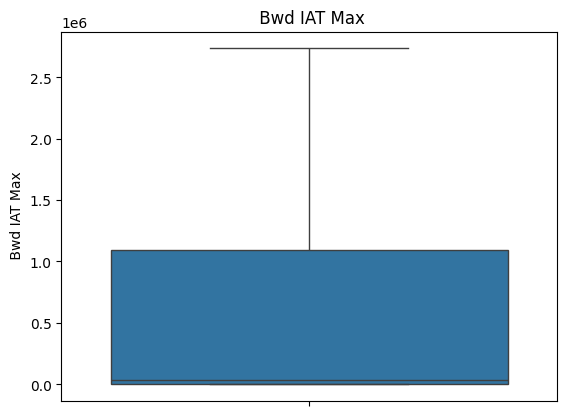

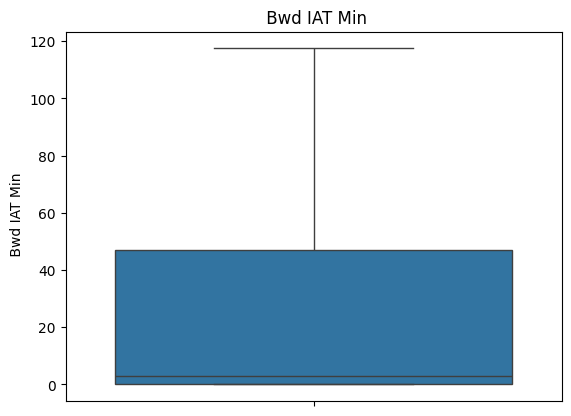

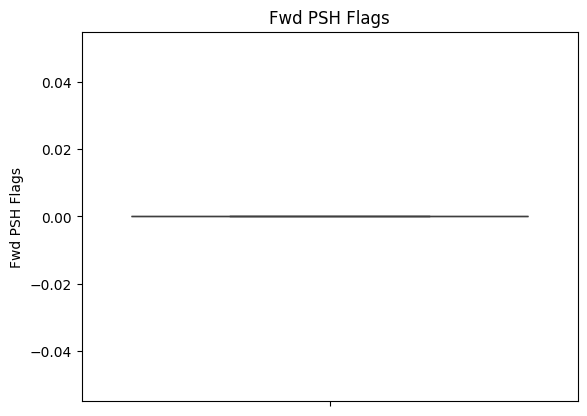

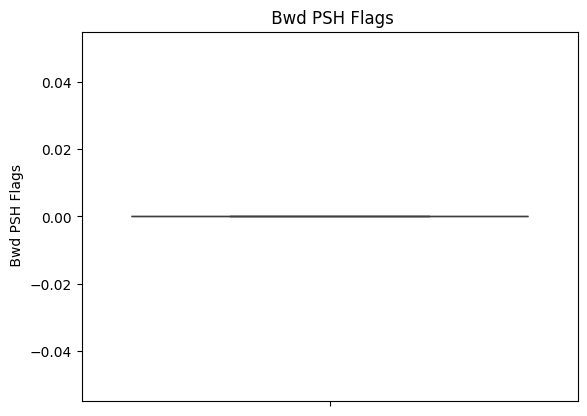

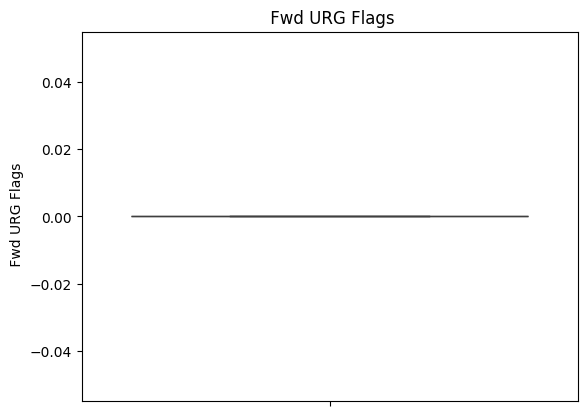

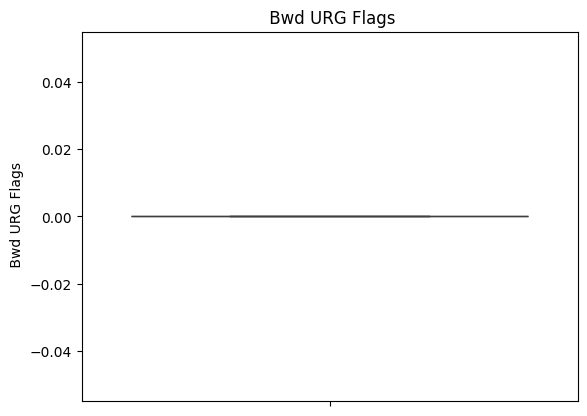

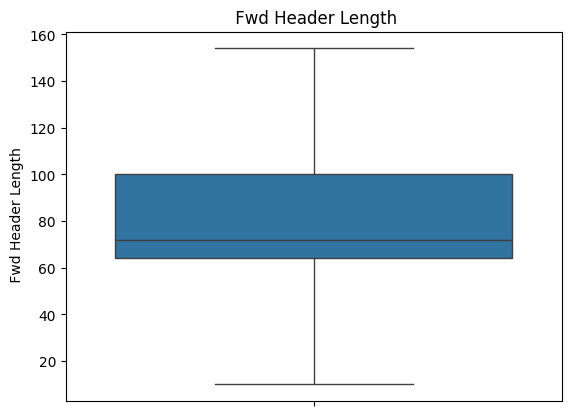

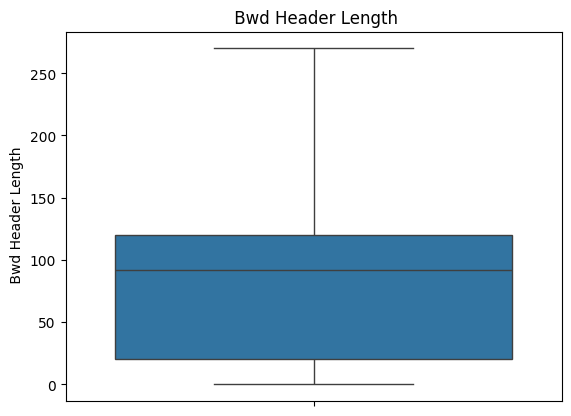

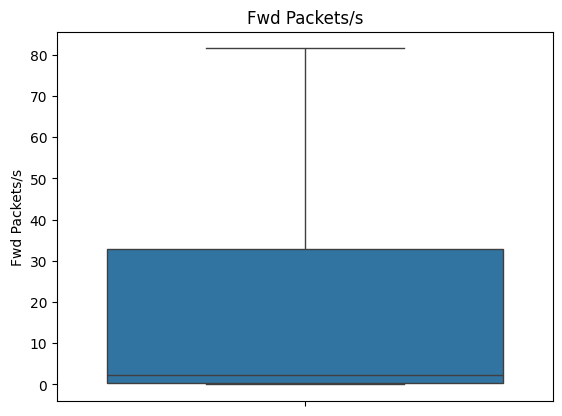

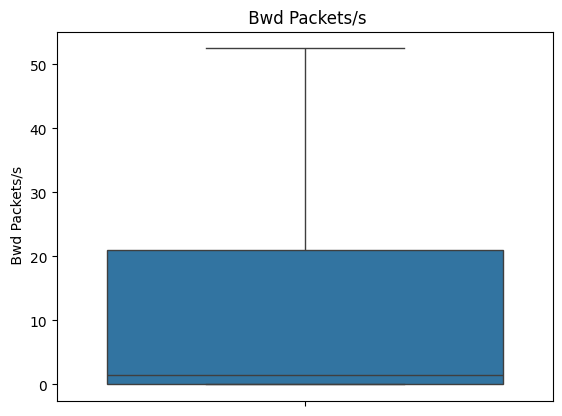

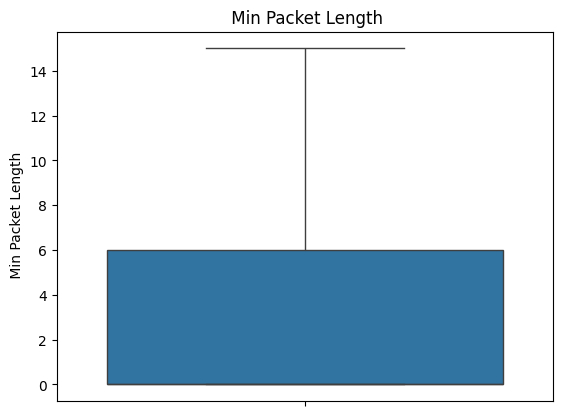

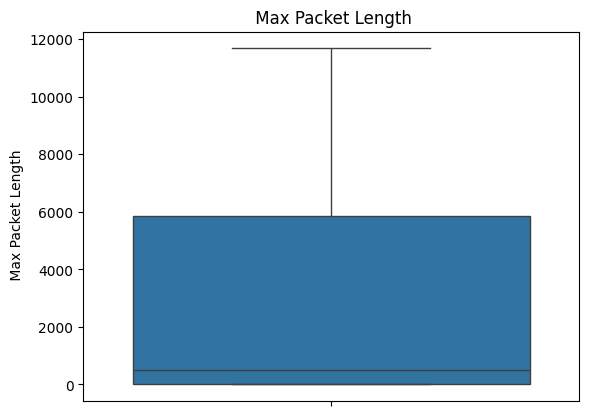

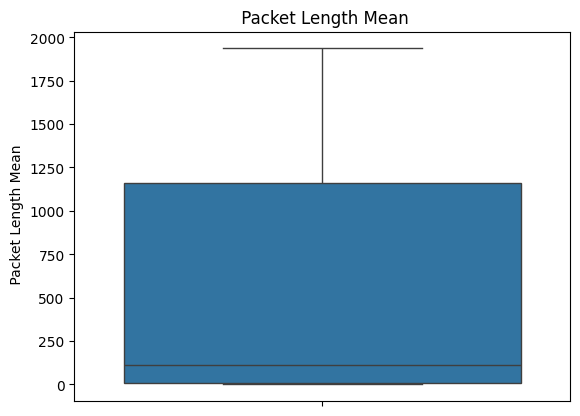

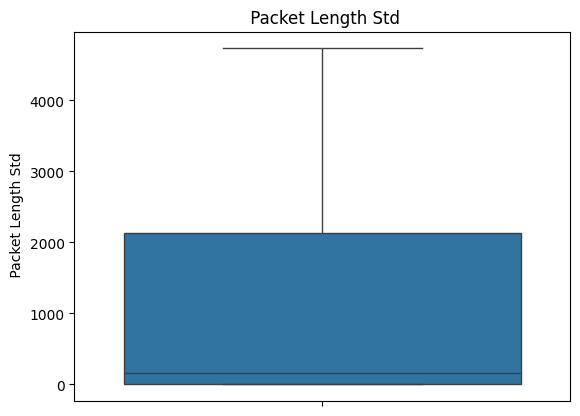

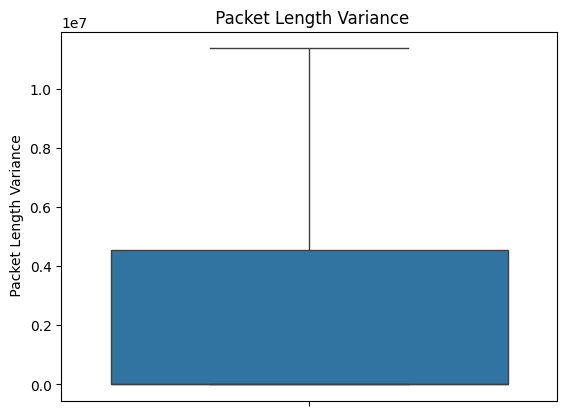

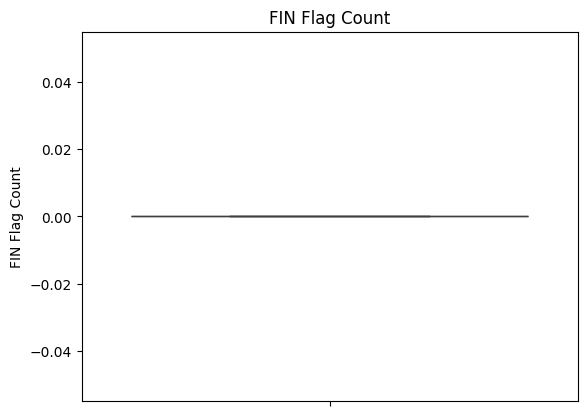

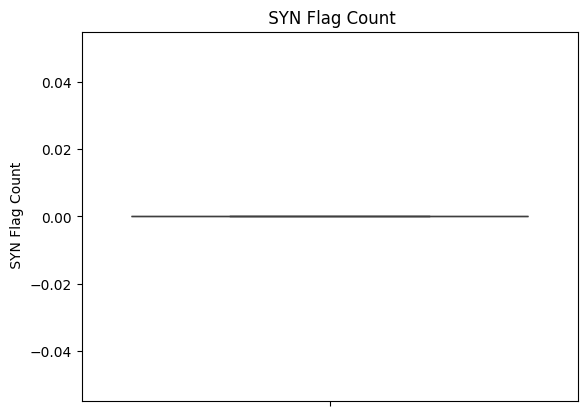

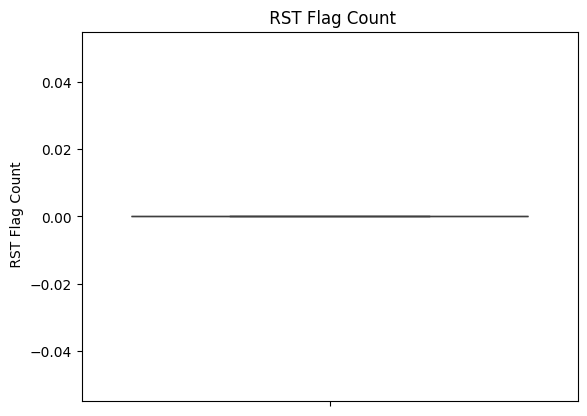

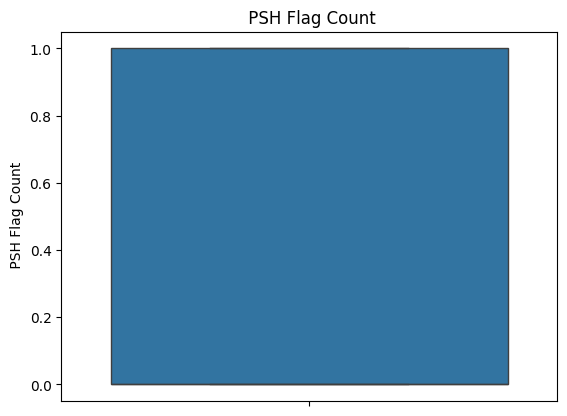

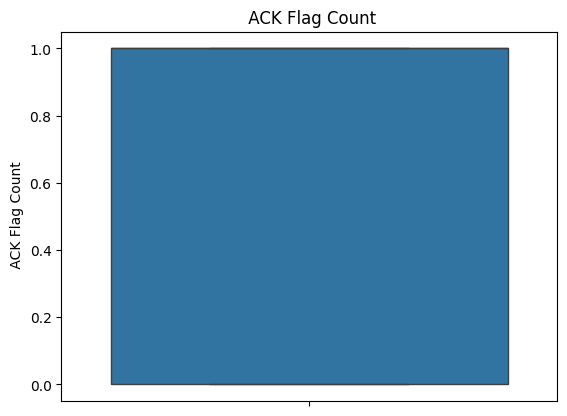

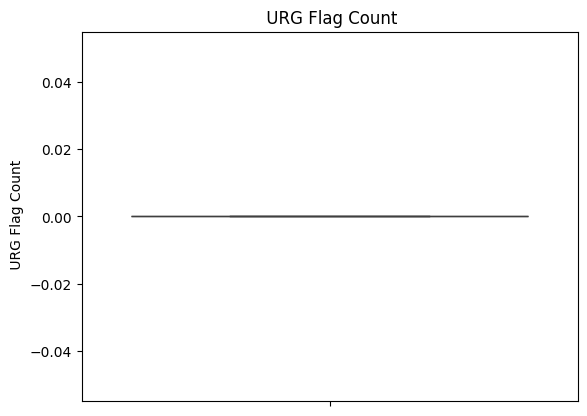

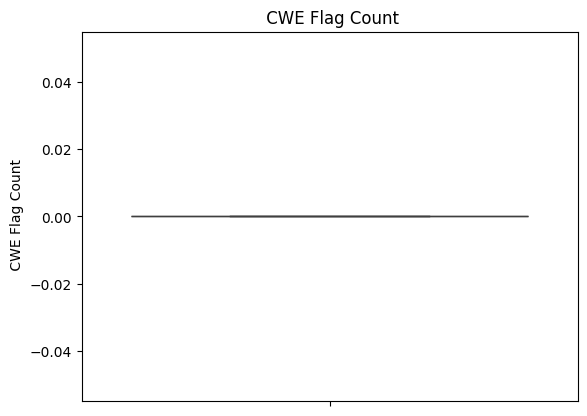

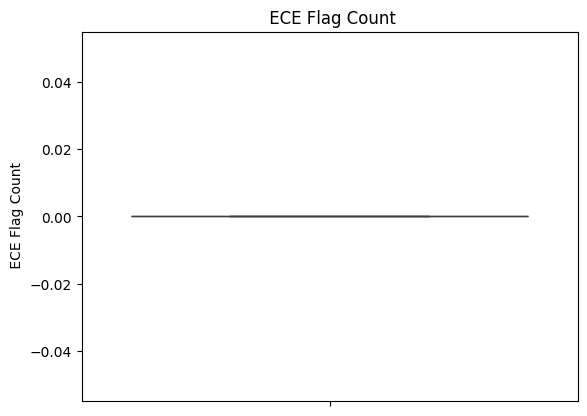

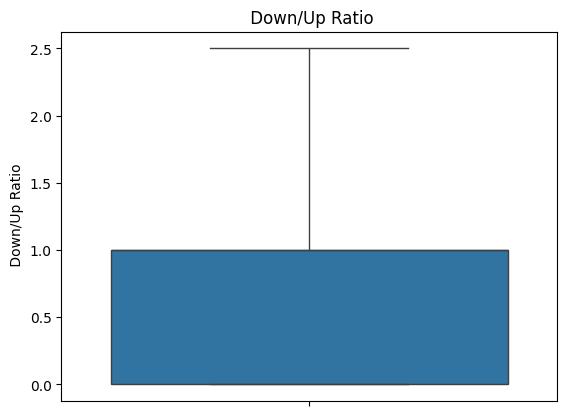

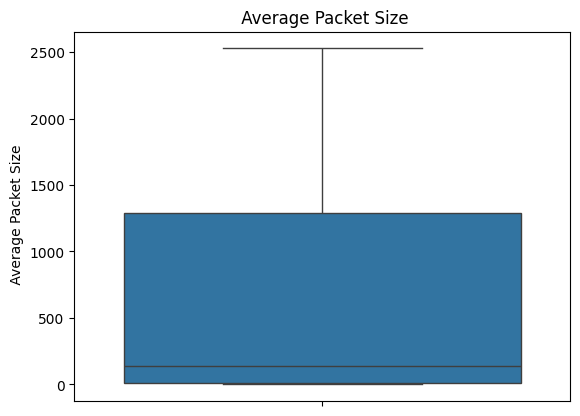

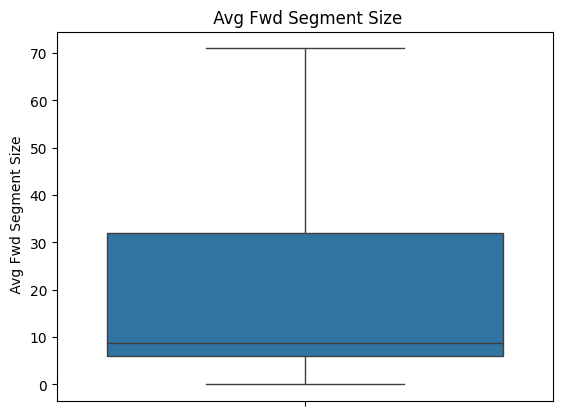

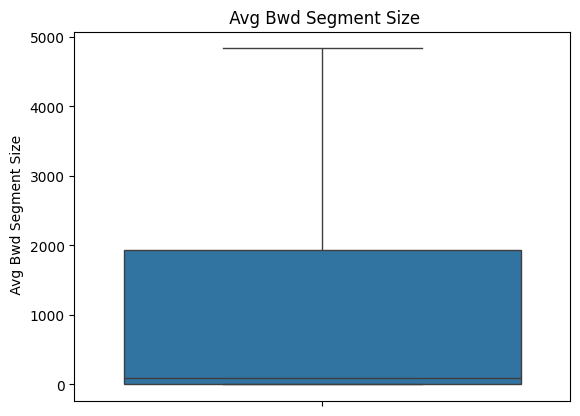

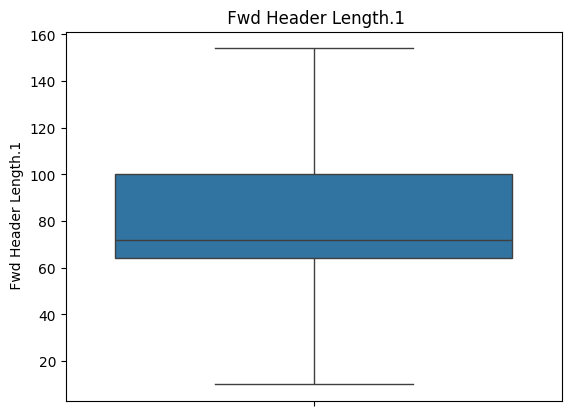

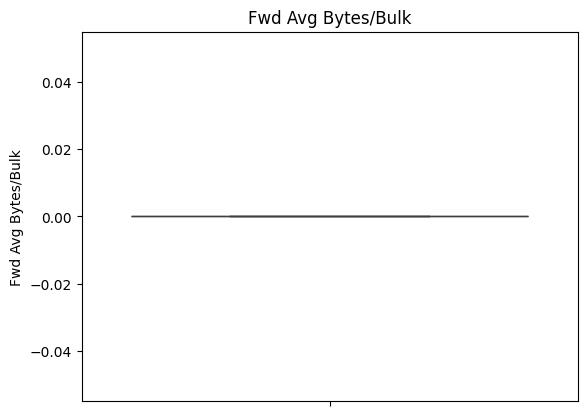

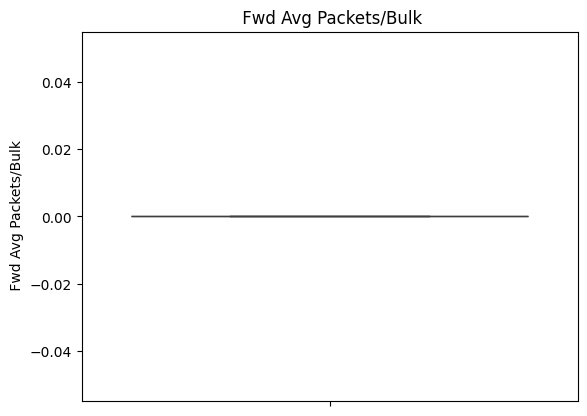

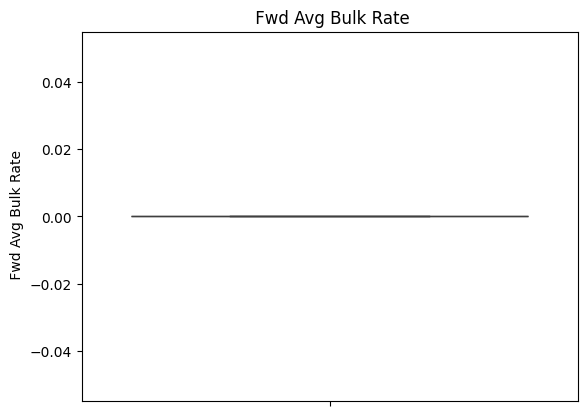

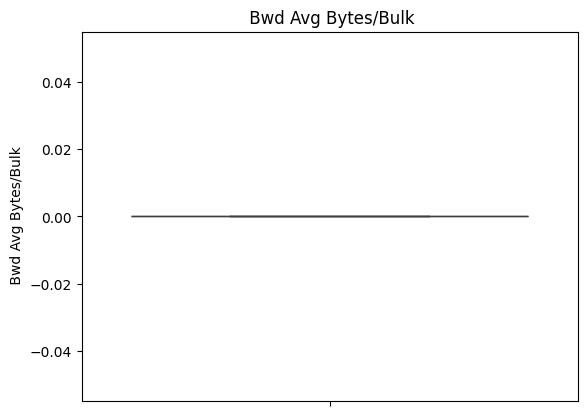

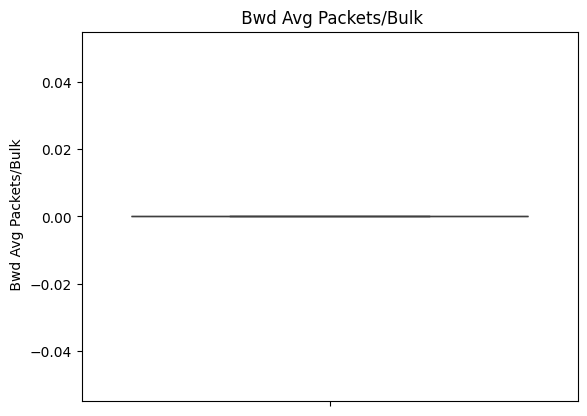

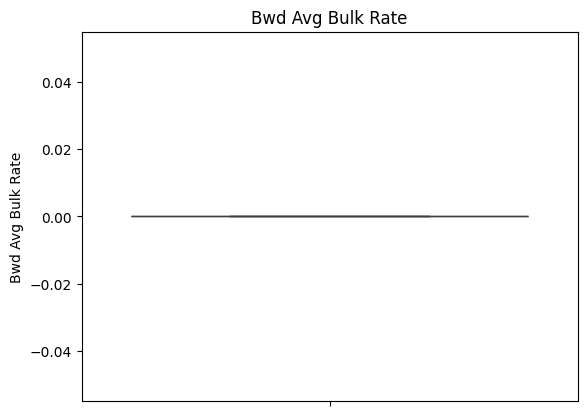

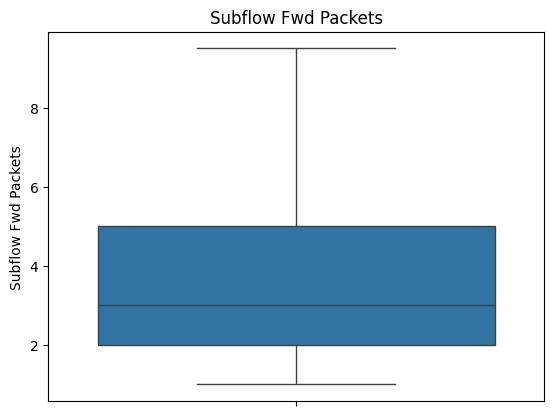

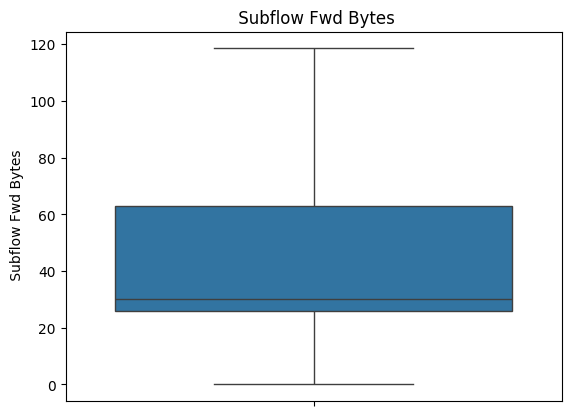

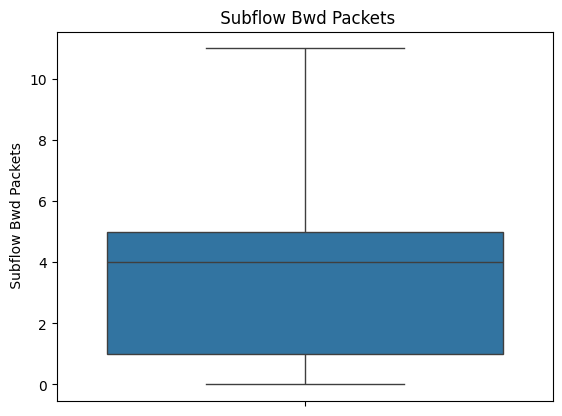

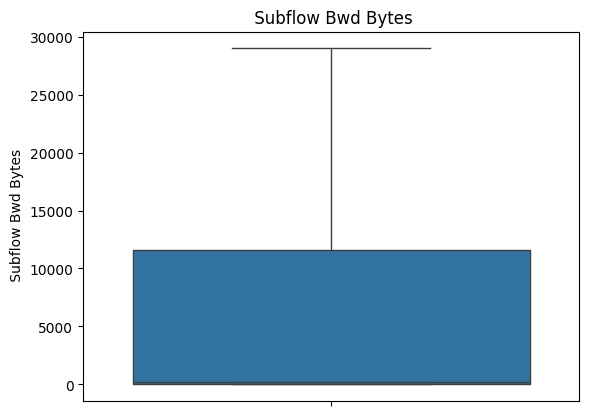

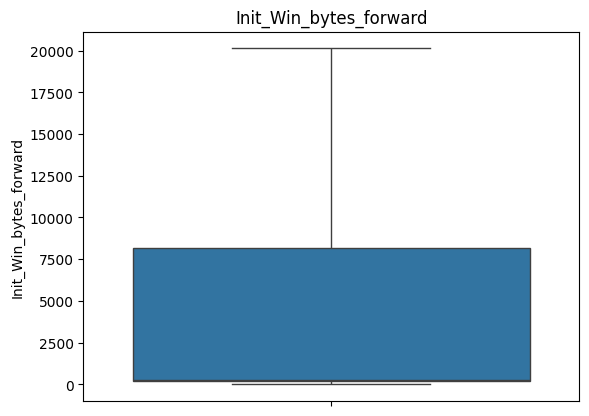

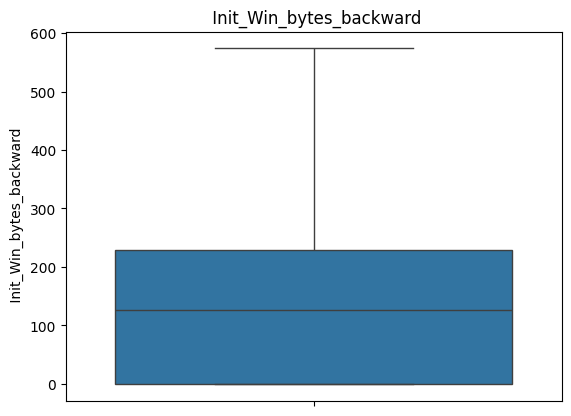

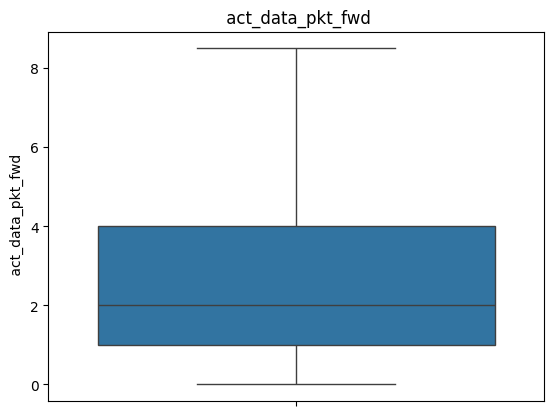

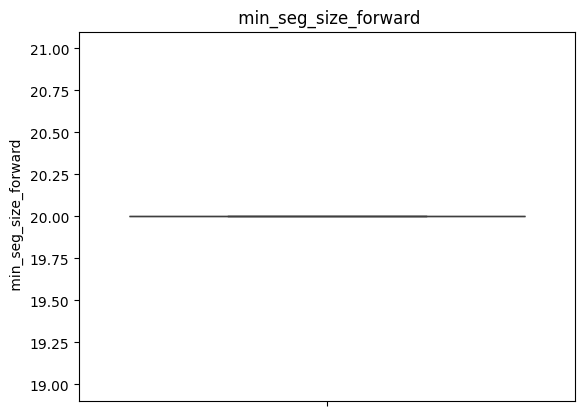

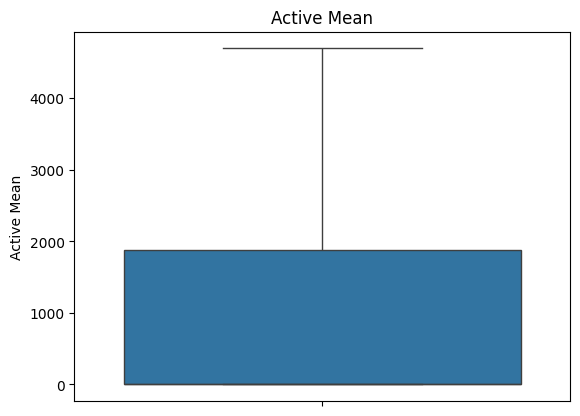

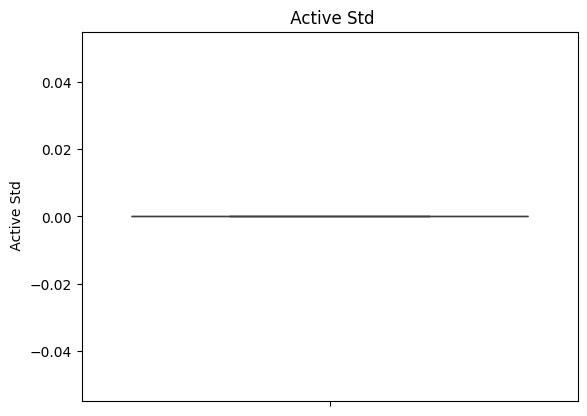

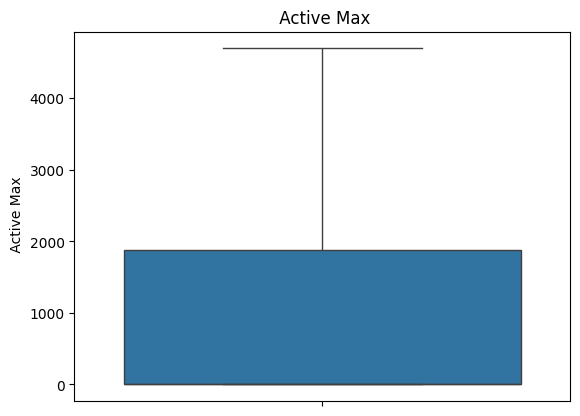

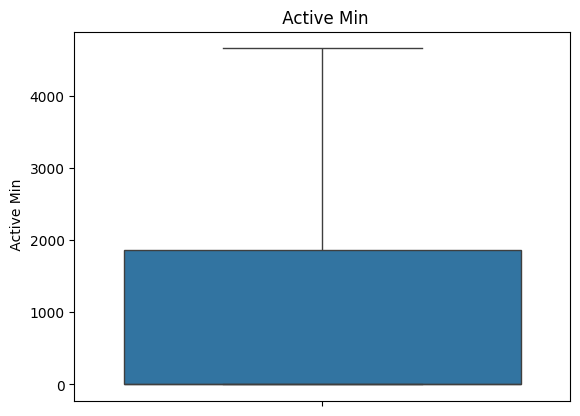

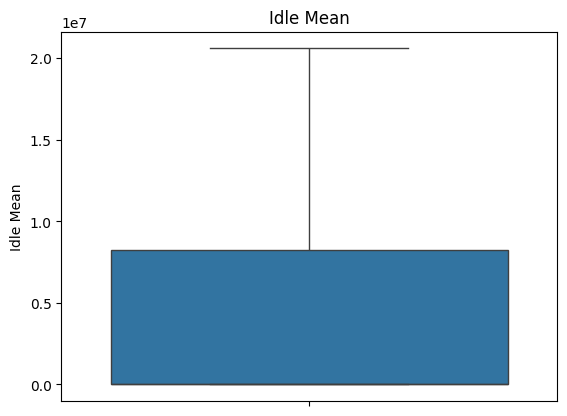

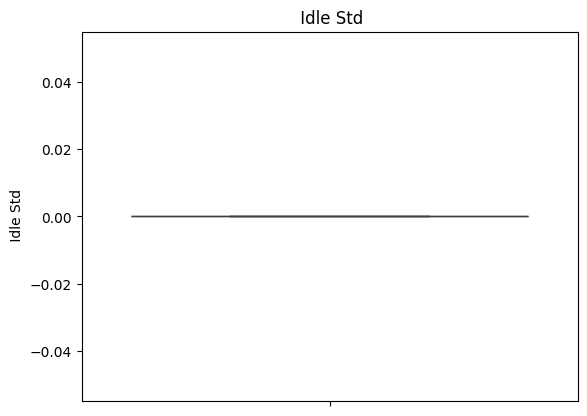

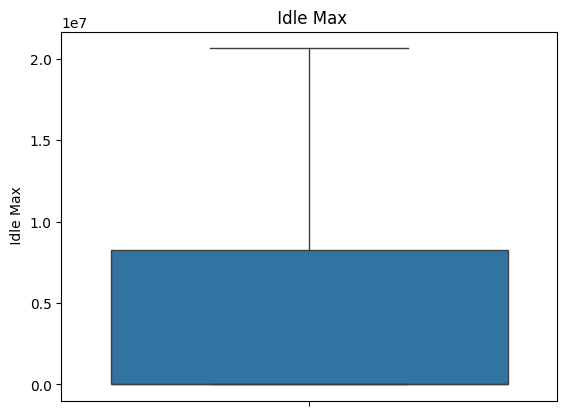

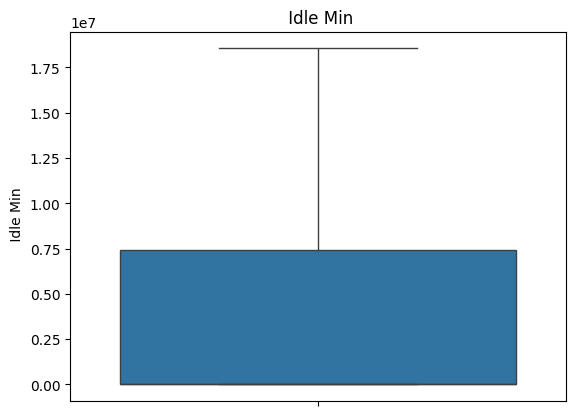

In [12]:
import matplotlib.pyplot as plt

for column in num:
  plt.figure()
  sns.boxplot(df[column])
  plt.title(column)
  plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat:
  df[col] = le.fit_transform(df[col])

y = df[' Label']
X = df.drop(' Label', axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
import time

# Measure training time
train_start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
train_end_time = time.time()
training_time = train_end_time - train_start_time

# Measure testing time
test_start_time = time.time()
y_pred = gnb.predict(X_test)
test_end_time = time.time()
testing_time = test_end_time - test_start_time

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training time: {:.6f} seconds".format(training_time))
print("Testing time: {:.6f} seconds".format(testing_time))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9947507143015349
Precision: 0.9942278610527002
Recall: 0.995092447124515
F1 Score: 0.9946498889679186
Training time: 0.390563 seconds
Testing time: 0.072890 seconds
Confusion Matrix:
[[19357    48]
 [  189 25555]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19405
           1       1.00      0.99      1.00     25744

    accuracy                           0.99     45149
   macro avg       0.99      1.00      0.99     45149
weighted avg       0.99      0.99      0.99     45149



In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import time

# Different values for the var_smoothing parameter
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

# Loop through the different var_smoothing values and observe the results
for var_smoothing in var_smoothing_values:
    # Measure training time
    train_start_time = time.time()
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(X_train, y_train)
    train_end_time = time.time()
    training_time = train_end_time - train_start_time

    # Measure testing time
    test_start_time = time.time()
    y_pred = gnb.predict(X_test)
    test_end_time = time.time()
    testing_time = test_end_time - test_start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\nResults for var_smoothing={var_smoothing}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Training time: {:.6f} seconds".format(training_time))
    print("Testing time: {:.6f} seconds".format(testing_time))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Results for var_smoothing=1e-09:
Accuracy: 0.9947507143015349
Precision: 0.9942278610527002
Recall: 0.995092447124515
F1 Score: 0.9946498889679186
Training time: 0.261778 seconds
Testing time: 0.071375 seconds
Confusion Matrix:
[[19357    48]
 [  189 25555]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19405
           1       1.00      0.99      1.00     25744

    accuracy                           0.99     45149
   macro avg       0.99      1.00      0.99     45149
weighted avg       0.99      0.99      0.99     45149


Results for var_smoothing=1e-08:
Accuracy: 0.9947507143015349
Precision: 0.9942278610527002
Recall: 0.995092447124515
F1 Score: 0.9946498889679186
Training time: 0.340729 seconds
Testing time: 0.059422 seconds
Confusion Matrix:
[[19357    48]
 [  189 25555]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     1940

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import time

# Assuming binary classification with class labels 0 and 1
# Create different sets of priors
priors_list = [
    [0.5, 0.5],
    [0.7, 0.3],
    [0.3, 0.7],
    [0.6, 0.4],
    [1.0, 1.0]  # Practically similar to [0.5, 0.5]
]

# Loop through the different priors and observe the results
for priors in priors_list:
    # Measure training time
    train_start_time = time.time()
    gnb = GaussianNB(priors=priors)
    gnb.fit(X_train, y_train)
    train_end_time = time.time()
    training_time = train_end_time - train_start_time

    # Measure testing time
    test_start_time = time.time()
    y_pred = gnb.predict(X_test)
    test_end_time = time.time()
    testing_time = test_end_time - test_start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\nResults for priors={priors}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Training time: {:.6f} seconds".format(training_time))
    print("Testing time: {:.6f} seconds".format(testing_time))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Results for priors=[0.5, 0.5]:
Accuracy: 0.9946842676471239
Precision: 0.9941237832702693
Recall: 0.9950659038896288
F1 Score: 0.9945826020834058
Training time: 0.309904 seconds
Testing time: 0.071769 seconds
Confusion Matrix:
[[19362    43]
 [  197 25547]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19405
           1       1.00      0.99      1.00     25744

    accuracy                           0.99     45149
   macro avg       0.99      1.00      0.99     45149
weighted avg       0.99      0.99      0.99     45149


Results for priors=[0.7, 0.3]:
Accuracy: 0.9947285654167313
Precision: 0.9940589863954279
Recall: 0.9952379835212551
F1 Score: 0.9946290714191806
Training time: 0.332915 seconds
Testing time: 0.072819 seconds
Confusion Matrix:
[[19383    22]
 [  216 25528]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19405


ValueError: The sum of the priors should be 1.